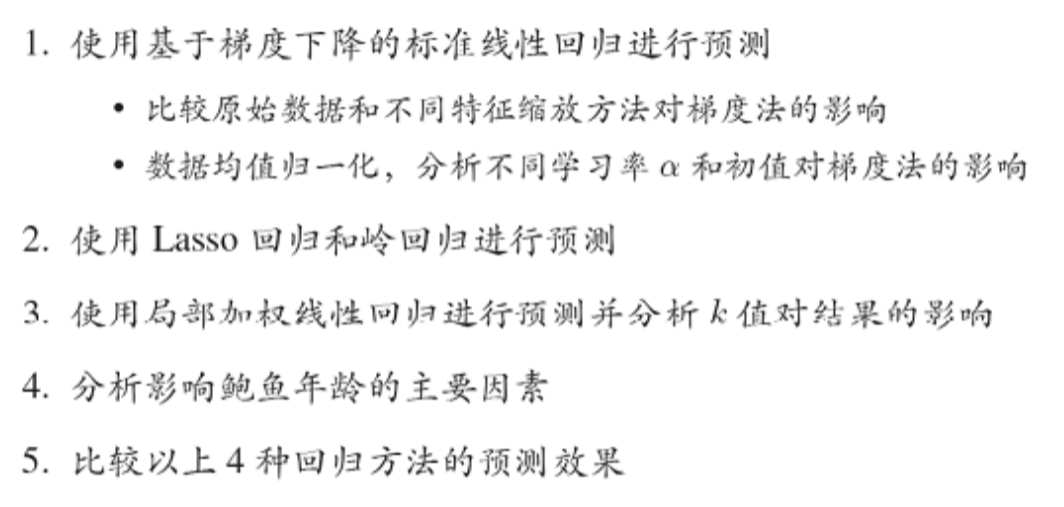

In [22]:
# 从http://archive.ics.uci.edu/dataset/1/abalone下载数据
# 保存到本地文件abalone.data

import urllib.request
import os

# 下载数据
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
filepath = "abalone.data"
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url, filepath)
    print('downloaded:', result)
else:
    print('Data file already exists.')

# 查看数据
import pandas as pd
df = pd.read_csv(filepath, header=None, prefix='V')
# 修改df的列名
df.columns =[ '性别','长度','直径','高度','整体重量','去壳重量','脏器重量','壳的重量','环数']
df.head()

Data file already exists.


C:\Users\25435\AppData\Local\Temp\ipykernel_32720\3346649684.py:18: FutureWarning: The prefix argument has been deprecated and will be removed in a future version. Use a list comprehension on the column names in the future.


  df = pd.read_csv(filepath, header=None, prefix='V')


,性别,长度,直径,高度,整体重量,去壳重量,脏器重量,壳的重量,环数
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
# 使用pandas将df除了性别列的数据进行标准化生成新的df_norm
df_norm = df.iloc[:,1:8]
df_norm = (df_norm - df_norm.mean())/df_norm.std()
df_norm['性别']=df['性别']
df_norm['环数']=df['环数']
df_norm.head()

,长度,直径,高度,整体重量,去壳重量,脏器重量,壳的重量,性别,环数
0,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,M,15
1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,M,7
2,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,F,9
3,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,M,10
4,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,I,7


In [24]:
# 数据预处理
df['年龄']=df['环数']+1.5
df['截距']=1
# 使用OneHot对性别进行编码
sex_onehot =pd.get_dummies(df['性别'],prefix='性别')
#prefix--前缀
df[sex_onehot.columns] = sex_onehot

df.head()


,性别,长度,直径,高度,整体重量,去壳重量,脏器重量,壳的重量,环数,年龄,截距,性别_F,性别_I,性别_M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,1,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,1,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,1,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,1,0,1,0


In [25]:
# 筛选特征
y=df['环数']
# 避免多重共线性，删除一列
features=['长度','直径','高度','整体重量','去壳重量','脏器重量','壳的重量','截距','性别_F','性别_I']
X=df[features]

In [26]:
# 10折交叉验证划分训练集和测试集
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
for train_index, test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=111)

In [28]:
# 以下为标准方法
import numpy as np
def linear_regression(X,y):
    w = np.zeros_like(X.shape[1])
    if np.linalg.det(X.T.dot(X))!=0:
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

linear_regression(X_train,y_train)

array([-1.11814600e+00,  1.00009460e+01,  2.07371262e+01,  9.61484657e+00,
       -2.00507929e+01, -1.20684919e+01,  6.54529076e+00,  3.69730786e+00,
        5.72104232e-03, -8.72830833e-01])

In [29]:
from LinerRegression import *

In [30]:
linear_regression(X_train,y_train)

array([-1.11814600e+00,  1.00009460e+01,  2.07371262e+01,  9.61484657e+00,
       -2.00507929e+01, -1.20684919e+01,  6.54529076e+00,  3.69730786e+00,
        5.72104232e-03, -8.72830833e-01])

In [31]:
err_func(linear_regression(X_train,y_train),X_train,y_train)

2.3720315312640787

In [34]:
theta,err,k=gradient_descent(X_train, y_train, 0.5, iters=50000)

第50000次迭代，损失函数值为：[[2.3720325]]
theta: [[-1.05396774e+00]
 [ 9.92925883e+00]
 [ 2.06966204e+01]
 [ 9.61500726e+00]
 [-2.00524234e+01]
 [-1.20688278e+01]
 [ 6.55313593e+00]
 [ 3.69732110e+00]
 [ 5.80327812e-03]
 [-8.73255330e-01]]
<class 'numpy.matrix'>


In [18]:
# 将theta转换为array(numpy存在的小bug)
theta = np.array(theta).reshape(-1)
err_func(theta,X_test,y_test)

2.5287995723841563